# COGS 108 - Final Project

# Overview

2020 was a difficult and challenging year for a lot of us as we were forced to adapt to a lot of different lifestyle changes and regulations that we were not accustomed to due to the global pandemic. Due to this we wanted to see how the pandemic affected the job market for students graduating from college. However, the 2019 and 2020 data have not come out yet. Under that circumstance, we decided to analyze the relationship between unemployment rate, annual income, and the graduate enrollment rate of a major. We used the OLS(ordinary least squared) regression to test our models and found that there was a relationship between median annual income and graduation enrollment and a negative relationship between unemployment rate and graduation enrollment.


# Names

- Gavin Nijjer
- Gurinderbir Bains
- Xiaoshuo Yao
- Jiadong Chen

<a id='research_question'></a>
# Research Question

To what extent did the unemployment rate and salary affect graduate school enrollment of a major?

# Background and Prior Work

As most of the members in our group are nearing graduation and the job market being as volatile as ever this topic became of great interest to us. We were curious and interested to see how unemployment rate and income were affecting graduate school enrollment. 
 
Based on our research and prior knowledge we predicted that as the unemployment rate rises, the graduate school enrollment rate would also increase. In addition, we also agreed that income would also play a significant role in deciding graduate school enrollment rates. Looking at the data from the CORGIS dataset project (https://corgis-edu.github.io/corgis/datasets/csv/graduates/graduates.csv) we were able to look at the mean salary for a variety of majors and see how many people from that major went on to pursue a masters degree. The article by Statista(https://www.statista.com/statistics/633660/unemployment-rate-of-recent-graduates-in-the-us/) was able to gives the unemployment rates of recent graduates but it was difficult to find a article that correlated this unemployment rate with how many of the graduates went on to pursue a masters. 

This is important because as people are beginning to enter the real world getting a general idea of how many people enroll in graduate school based on the unemployment rate of a major or income can be really helpful. 

A lot of research has been done regarding unemployment rate, income and percentage of people enrolling in graduate school. The article on Statista(https://www.statista.com/statistics/633660/unemployment-rate-of-recent-graduates-in-the-us/) informs people about the unemployment rate of recent graduates in the U.S. Another article by the Pew Research Center (https://www.pewresearch.org/fact-tank/2020/06/11/unemployment-rose-higher-in-three-months-of-covid-19-than-it-did-in-two-years-of-the-great-recession/) explains how the pandemic affected unemployment rates. There is a lot of statistical data on unemployment rates, income, and graduate school enrollment but not much on how they all correlate with each other, which we aimed to answer in this project. 


# Hypothesis

We hypothesize that the enrollment rate of new graduate students will drop as the unemployment rate rises since more students will choose to enter graduate school. We assume the reason behind that is because higher unemployment rates may enforce students to pursue higher education to secure themselves. We also hypothesize that higher annual income will have positive correlation with graduate enrollment rate. But those two variables may influence each other so there is no independent variable.

# Datasets

1.
- Dataset Name: 
Number, percentage distribution, unemployment rates, and median earnings of 25- to 29-year-old bachelor’s degree holders and percentage of degree holders among all 25- to 29-year- olds, by field of study and science, technology, engineering, or mathematics (STEM) from 2012 to 2018

- Link to the dataset: https://nces.ed.gov/programs/digest/d19/tables/dt19_505.10.asp
https://nces.ed.gov/programs/digest/d18/tables/dt18_505.10.asp
https://nces.ed.gov/programs/digest/d17/tables/dt17_505.10.asp
https://nces.ed.gov/programs/digest/d16/tables/dt16_505.10.asp
https://nces.ed.gov/programs/digest/d15/tables/dt15_505.10.asp
https://nces.ed.gov/programs/digest/d14/tables/dt14_505.10.asp
https://nces.ed.gov/programs/digest/d13/tables/dt13_505.10.asp

- Number of observations: 62 for 2015-2018, 30 for 2012-2015

These dataset include undergraduate student's study field, unemployment rate, median salary and other stats for 2010 and 2018.

2.
- Dataset Name: 
Graduates CSV File
From the CORGIS Dataset Project

- Link to the dataset:
https://corgis-edu.github.io/corgis/datasets/csv/graduates/graduates.csv

- Number of observations:
517

This dataset provide a detailed view of incomes in different field of studies from multiple different years from 1993 to 2015.

3.
- Dataset Name: 
	Bachelor's degrees conferred by postsecondary institutions, by field of study: Selected years, 1970-71 through 2018-19

- Link to the dataset:
https://nces.ed.gov/programs/digest/d19/tables/dt19_322.10.asp

- Number of observations:
35

This dataset provide enrollment data in terms of majors for graduate schools in different years.

4.
- Dataset Name: 
Master's degrees conferred by postsecondary institutions, by field of study: Selected years, 1970-71 through 2017-18

- Link to the dataset:
https://nces.ed.gov/programs/digest/d20/tables/dt20_323.10.asp

- Number of observations:
41

This dataset provide enrollment data in terms of majors for graduate schools in different years.

5.
- Dataset Name: 
Master's degrees conferred by postsecondary institutions, by field of study: Selected years, 1970-71 through 2017-18

- Link to the dataset:
https://nces.ed.gov/programs/digest/d19/tables/dt19_505.06.asp

- Number of observations:
65

This dataset provide income and unemployment data in terms of majors for bachelor’s degree holders in 2010 and 2018. 

For now, our idea is to use the third dataset as the backbone of the analysis and use other three dataset to elaborate on it.

# Setup

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from sklearn.svm import SVC

# Data Cleaning

First data

In [2]:
def read_xls(file, thresh = 33, position=0):
    read_df = pd.read_excel(file, header=[2, 4])
    read_df.columns = read_df.columns.droplevel(0)
    read_df = read_df.dropna(thresh=thresh)
    read_df = read_df.dropna(axis=1)
    read_df = read_df.loc[:, ~(read_df == ' ').any()]
    major = read_df.iloc[:,position]
    unemploy = read_df.iloc[:,-6]
    income = read_df.iloc[:,-4]
    res_df = pd.DataFrame({'major': major, 'unemployment': unemploy, 'earning': income}).reset_index().drop('index', axis=1)
    return res_df

Extract unemployment and income data from past several years

In [3]:
graduateData = {}
d1_files = ["12graduates.xls","13graduates.xls","14graduates.xls","15graduates.xls","16graduates.xls","17graduates.xls","18graduates.xls"]
year_count = 2012
for f in d1_files:
    if(year_count < 2015):
        graduateData[year_count] = read_xls(f,32,1)
    else:
        graduateData[year_count] = read_xls(f)
    year_count = year_count + 1

In [4]:
graduateData[2018].head()

,major,unemployment,earning
0,Agriculture,1.75441,45380.0
1,Architecture,1.84892,52170.0
2,"Area, ethnic, and civilization studies",1.67568,50140.0
3,"Arts, fine and commercial",3.6533,42520.0
4,Fine arts,3.71549,40500.0


remove the dots in the majors names

In [5]:
def remove_dots(dataframe, field):
    field_list = dataframe[field].tolist()

    for i in range(0,len(field_list)):
        temp = ''
        for c in field_list[i]:
            if(c != '.'):
                temp = temp + c
            else:
                break
        field_list[i] = temp
    return field_list

In [6]:
year_count = 2012
while(year_count < 2019):
    graduateData[year_count]['major'] = remove_dots(graduateData[year_count], 'major')
    year_count = year_count + 1

In [7]:
graduateData[2013].head()

,major,unemployment,earning
0,Architecture,7.20613,45040.0
1,"Area, ethnic, and civilization studies",6.9214,40740.0
2,Communications and communications technologies,5.14267,42310.0
3,Computer and information systems,3.45344,60270.0
4,General education,3.25855,39920.0


Import the second dataset, this dataset is a .csv file so there's no weird headers, so for cleaning I only removed the empty roles and unused columns.


In [8]:
#import the data for detailed income and unemployment statistics
income = pd.read_csv("graduates.csv")
income.head()

,Year,Demographics.Total,Education.Major,Salaries.Highest,Salaries.Lowest,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
0,1993,1295598,Biological Sciences,999999.0,0.0,160585.73,51000.0,13432,297818.25,84495,...,118772,191867,365049,539430,99749,103385,506252,269042,215169,381908
1,1993,211875,Chemical Engineering,999999.0,9000.0,126176.52,56000.0,3375,245705.77,27531,...,82344,76108,59299,102248,16361,30480,24690,63895,44780,17718
2,1993,507616,Chemistry,999999.0,8000.0,148872.00,60000.0,7834,276000.33,49984,...,81772,123256,121783,208278,35007,40898,129716,114801,78059,104191
3,1993,336366,Civil Engineering,999999.0,10000.0,129070.55,50000.0,4035,259543.49,37295,...,133430,62031,108338,203035,37940,28639,70727,116758,73133,26892
4,1993,1070111,Computer Science and Math,999999.0,0.0,134299.53,49000.0,9996,269323.82,83826,...,251941,200490,287405,439446,62482,73411,126083,223467,168404,234507


In [9]:
#drop the rows with no data i.e.the major is not in the statistic for that year
income = income.loc[income['Salaries.Highest'] != 0]

#drop the uneeded columns
income = income.drop(columns=['Salaries.Highest','Salaries.Lowest','Employment.Reason Working Outside Field.Career Change',
       'Employment.Reason Working Outside Field.Family-related',
       'Employment.Reason Working Outside Field.Job Location',
       'Employment.Reason Working Outside Field.Other',
       'Employment.Reason Working Outside Field.Pay/Promotion',
       'Employment.Reason Working Outside Field.Working Conditions',
       'Employment.Reason for Not Working.Family',
       'Employment.Reason for Not Working.Layoff',
       'Employment.Reason for Not Working.No need/want',
       'Employment.Reason for Not Working.Student','Employment.Work Activity.Accounting/Finance/Contracts',
       'Employment.Work Activity.Applied Research',
       'Employment.Work Activity.Basic Research',
       'Employment.Work Activity.Computer Applications',
       'Employment.Work Activity.Design',
       'Employment.Work Activity.Development',
       'Employment.Work Activity.Human Resources',
       'Employment.Work Activity.Managing/Supervising People/Projects',
       'Employment.Work Activity.Other',
       'Employment.Work Activity.Productions/Operations/Maintenance',
       'Employment.Work Activity.Professional Service',
       'Employment.Work Activity.Qualitity/Productivity Management',
       'Employment.Work Activity.Sales, Purchasing, Marketing',
       'Employment.Work Activity.Teaching'])
income.head()

,Year,Demographics.Total,Education.Major,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,...,Education.Degrees.Masters,Education.Degrees.Professionals,Employment.Employer Type.Business/Industry,Employment.Employer Type.Educational Institution,Employment.Employer Type.Government,Employment.Reason Working Outside Field.No Job Available,Employment.Reason for Not Working.No Job Available,Employment.Status.Employed,Employment.Status.Not in Labor Force,Employment.Status.Unemployed
0,1993,1295598,Biological Sciences,160585.73,51000.0,13432,297818.25,84495,115016,1094775,...,248813,284869,669270,300468,121117,76598,14976,1090855,181940,22803
1,1993,211875,Chemical Engineering,126176.52,56000.0,3375,245705.77,27531,11278,173067,...,61809,7159,150692,10640,12879,7164,3168,174210,34018,3647
2,1993,507616,Chemistry,148872.00,60000.0,7834,276000.33,49984,35181,421911,...,101591,79700,279775,88760,38050,19280,7902,406585,89594,11437
3,1993,336366,Civil Engineering,129070.55,50000.0,4035,259543.49,37295,17421,281442,...,87754,3490,186818,13541,87878,6616,5578,288237,39966,8163
4,1993,1070111,Computer Science and Math,134299.53,49000.0,9996,269323.82,83826,98047,887476,...,258567,18650,665249,183217,89658,50406,16227,938124,103062,28925


Classify the dataset by year, I think this would facilitate future analysis.

In [10]:
#create a list of years for classification
years = income.Year.unique()

#use a library to classify the data by year
incomeByYears = {}
for i in years:
    incomeByYears[i] = income.loc[income['Year'] == i]

#reset the index
for d in years:
    incomeByYears[d] = incomeByYears[d].reset_index()

#look at the 1993 dataset as an example
incomeByYears[1993].head()

,index,Year,Demographics.Total,Education.Major,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,...,Education.Degrees.Masters,Education.Degrees.Professionals,Employment.Employer Type.Business/Industry,Employment.Employer Type.Educational Institution,Employment.Employer Type.Government,Employment.Reason Working Outside Field.No Job Available,Employment.Reason for Not Working.No Job Available,Employment.Status.Employed,Employment.Status.Not in Labor Force,Employment.Status.Unemployed
0,0,1993,1295598,Biological Sciences,160585.73,51000.0,13432,297818.25,84495,115016,...,248813,284869,669270,300468,121117,76598,14976,1090855,181940,22803
1,1,1993,211875,Chemical Engineering,126176.52,56000.0,3375,245705.77,27531,11278,...,61809,7159,150692,10640,12879,7164,3168,174210,34018,3647
2,2,1993,507616,Chemistry,148872.00,60000.0,7834,276000.33,49984,35181,...,101591,79700,279775,88760,38050,19280,7902,406585,89594,11437
3,3,1993,336366,Civil Engineering,129070.55,50000.0,4035,259543.49,37295,17421,...,87754,3490,186818,13541,87878,6616,5578,288237,39966,8163
4,4,1993,1070111,Computer Science and Math,134299.53,49000.0,9996,269323.82,83826,98047,...,258567,18650,665249,183217,89658,50406,16227,938124,103062,28925


In [11]:
undergraduate = pd.read_excel("tabn322.10.xls",header=[1])
undergraduate = undergraduate.dropna()
#remove the first row, which is useless
undergraduate = undergraduate.drop([0])
undergraduate = undergraduate.reset_index()
undergraduate = undergraduate.drop(['index'], axis=1)
undergraduate.head()

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,Total,839730.0,925746.0,935140.0,987823.0,1094538.0,1164792.0,1244171.0,1485104.0,1649919.0,1716053.0,1792163.0,1840381.0,1870150.0,1894969.0,1920750.0,1956114.0,1980665.0,2012854.0
1,Agriculture and natural resources\1\,12672.0,19402.0,21886.0,16823.0,13124.0,21425.0,23370.0,23052.0,26343.0,28630.0,30972.0,33592.0,35125.0,36278.0,36995.0,37734.0,39317.0,40458.0
2,Architecture and related services,5570.0,9146.0,9455.0,9119.0,9781.0,8352.0,8480.0,9515.0,10051.0,9831.0,9727.0,9757.0,9149.0,9090.0,8825.0,8579.0,8464.0,8806.0
3,"Area, ethnic, cultural, gender, and group studies",2579.0,3577.0,2887.0,3021.0,4776.0,5633.0,6160.0,7878.0,8620.0,8955.0,9228.0,8850.0,8275.0,7783.0,7840.0,7720.0,7717.0,7724.0
4,Biological and biomedical sciences,35705.0,54154.0,43078.0,38395.0,39482.0,61014.0,60576.0,70602.0,86391.0,89984.0,95850.0,100397.0,104657.0,109904.0,113794.0,116768.0,118661.0,121191.0


In [12]:
#function fot formatting the years
def modify_years(df):
    listOfYears = df.columns.tolist()
    for i in range(1,len(listOfYears)):
        listOfYears[i] = listOfYears[i][0:4]
    df.columns = listOfYears

In [13]:
modify_years(undergraduate)
undergraduate.head()

,Field of study,1970,1975,1980,1985,1990,1995,2000,2005,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Total,839730.0,925746.0,935140.0,987823.0,1094538.0,1164792.0,1244171.0,1485104.0,1649919.0,1716053.0,1792163.0,1840381.0,1870150.0,1894969.0,1920750.0,1956114.0,1980665.0,2012854.0
1,Agriculture and natural resources\1\,12672.0,19402.0,21886.0,16823.0,13124.0,21425.0,23370.0,23052.0,26343.0,28630.0,30972.0,33592.0,35125.0,36278.0,36995.0,37734.0,39317.0,40458.0
2,Architecture and related services,5570.0,9146.0,9455.0,9119.0,9781.0,8352.0,8480.0,9515.0,10051.0,9831.0,9727.0,9757.0,9149.0,9090.0,8825.0,8579.0,8464.0,8806.0
3,"Area, ethnic, cultural, gender, and group studies",2579.0,3577.0,2887.0,3021.0,4776.0,5633.0,6160.0,7878.0,8620.0,8955.0,9228.0,8850.0,8275.0,7783.0,7840.0,7720.0,7717.0,7724.0
4,Biological and biomedical sciences,35705.0,54154.0,43078.0,38395.0,39482.0,61014.0,60576.0,70602.0,86391.0,89984.0,95850.0,100397.0,104657.0,109904.0,113794.0,116768.0,118661.0,121191.0


Import the fourth dataset, this dataset is an excel file with only one layer of headers, so I just removed the empty roles.

In [14]:
#read the data for graduate school enrollment
graduate_enroll = pd.read_excel("tabn323.10.xls",header=[1])


#remove the empty rows which only contained description of the dataset
graduate_enroll = graduate_enroll.dropna()


graduate_enroll.head()

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,1,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
1,Total,235564.0,317477.0,302637.0,295850.0,342863.0,412180.0,473502.0,599862.0,693313.0,730922.0,755967.0,751718.0,754582.0,758804.0,785757.0,804542.0,820242.0,833706.0
2,Agriculture and natural resources\1\,2457.0,3340.0,4003.0,3801.0,3295.0,4551.0,4272.0,4653.0,5215.0,5766.0,6390.0,6336.0,6544.0,6426.0,6702.0,6843.0,6967.0,7288.0
3,Architecture and related services,1705.0,3215.0,3153.0,3260.0,3490.0,3993.0,4302.0,5743.0,7280.0,7788.0,8448.0,8095.0,8048.0,8006.0,7991.0,7883.0,7291.0,7311.0
4,"Area, ethnic, cultural, gender, and group studies",1032.0,993.0,802.0,915.0,1233.0,1652.0,1555.0,2080.0,1775.0,1913.0,1947.0,1897.0,1844.0,1847.0,1767.0,1717.0,1675.0,1590.0


I found that the row names which is the majors contains a lot of dots, which would make the anlysis harder, so I correct the names. And also change the format of the years to the format in the second dataset to facilitate future analysis.

In [15]:
#format years
modify_years(graduate_enroll)

#remove the first row, which is useless
graduate_enroll = graduate_enroll.drop([0])
graduate_enroll = graduate_enroll.reset_index()
graduate_enroll = graduate_enroll.drop(['index'], axis=1)

#check the outcome
graduate_enroll.head()

,Field of study,1970,1975,1980,1985,1990,1995,2000,2005,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Total,235564.0,317477.0,302637.0,295850.0,342863.0,412180.0,473502.0,599862.0,693313.0,730922.0,755967.0,751718.0,754582.0,758804.0,785757.0,804542.0,820242.0,833706.0
1,Agriculture and natural resources\1\,2457.0,3340.0,4003.0,3801.0,3295.0,4551.0,4272.0,4653.0,5215.0,5766.0,6390.0,6336.0,6544.0,6426.0,6702.0,6843.0,6967.0,7288.0
2,Architecture and related services,1705.0,3215.0,3153.0,3260.0,3490.0,3993.0,4302.0,5743.0,7280.0,7788.0,8448.0,8095.0,8048.0,8006.0,7991.0,7883.0,7291.0,7311.0
3,"Area, ethnic, cultural, gender, and group studies",1032.0,993.0,802.0,915.0,1233.0,1652.0,1555.0,2080.0,1775.0,1913.0,1947.0,1897.0,1844.0,1847.0,1767.0,1717.0,1675.0,1590.0
4,Biological and biomedical sciences,5625.0,6457.0,5766.0,5064.0,4834.0,6593.0,7017.0,8783.0,10730.0,11324.0,12419.0,13300.0,13964.0,14655.0,15717.0,16282.0,17180.0,18090.0


Import the forth dataset, this dataset is an excel file with some multilayer headers, so some extra processes are required. and there's a lot of empty roles and columns because of the format of excel file, so I also removed the empty rows and columns.

In [16]:
general_income_2018 = pd.read_excel("tabn505.06.xls",header=[2, 4])

#remove the extra header comes with the excel file
general_income_2018.columns = general_income_2018.columns.droplevel(0)

#remove the empty rows which only contained description of the dataset
general_income_2018 = general_income_2018.dropna(thresh=20)

#remove the empty columns caused by the read process
general_income_2018 = general_income_2018.dropna(axis=1)
general_income_2018 = general_income_2018.loc[:, ~(general_income_2018 == ' ').any()]

general_income_2018.head()

,Unnamed: 1_level_1,"Number, in thousands","Number, in thousands.2",Percentage distribution,Percentage distribution.2,Unnamed: 8_level_1,Unnamed: 10_level_1,"25- to 64-year-olds, total","25- to 64-year-olds, total.2",25- to 34-year-olds,...,"25- to 64-year-olds, total.3","25- to 64-year-olds, total.5",25- to 34-year-olds.3,25- to 34-year-olds.5,35- to 44-year-olds.3,35- to 44-year-olds.5,45- to 54-year-olds.3,45- to 54-year-olds.5,55- to 64-year-olds.3,55- to 64-year-olds.5
1,"Total, all bachelor's degrees",58050.712,148.247733,100.000000,(†),33.979811,0.081229,2.374708,0.028158,2.561836,...,70920.0,(#),55670.0,14.0,75900.0,23.0,85000.0,335.0,84910.0,561.0
2,Agriculture,571.051,8.728551,0.983711,0.0146385,0.334263,0.005106,1.296713,0.212397,1.521227,...,65510.0,516,50600.0,32.0,68380.0,2515.0,75600.0,1586.0,75520.0,4065.0
3,Architecture,430.625,7.944680,0.741808,0.0136426,0.252065,0.004649,2.547991,0.251643,1.972846,...,75960.0,18,59460.0,963.0,78210.0,3593.0,90860.0,1942.0,92530.0,3581.0
4,"Area, ethnic, and civilization studies",185.518,5.063197,0.319579,0.00860632,0.108592,0.002963,2.751499,0.451101,2.740856,...,67940.0,1468,51690.0,1563.0,70820.0,4163.0,85110.0,6475.0,82040.0,6453.0
5,"Arts, fine and commercial",2523.082,18.475278,4.346341,0.0306881,1.476879,0.010723,3.125408,0.134769,3.180020,...,55690.0,513,47600.0,1151.0,60620.0,110.0,65840.0,768.0,64340.0,1502.0


Remove the unused columns from the dataframe, and rename the columns for a clearer view of the data.



In [17]:
#remove the unneed columns
general_income_2018 = general_income_2018.drop(columns=[
    'Number, in thousands.2',
    'Percentage distribution.2',
    'Unnamed: 10_level_1',
    '25- to 64-year-olds, total.2',
    '25- to 34-year-olds.2','35- to 44-year-olds.2', 
    '45- to 54-year-olds.2',
    '55- to 64-year-olds.2',
    '25- to 64-year-olds, total.5',
    '25- to 34-year-olds.5',
    '35- to 44-year-olds.5',
    '45- to 54-year-olds.5',
    '55- to 64-year-olds.5'])

#rename the columns for easier use in the future
listOfCol = ['categories','total number of degree holder','percentage distribution of degree holder',
 'percentage in terms of all population','unemployment total','unemployment 25 to 34',
'unemployment 35 to 44', 'unemployment 45 to 54', 'unemployment 55 to 64', 'income 25 to 64, total', 'income 25 to 34',
'income 35 to 44', 'income 45 to 54', 'income 55 to 64']

general_income_2018.columns = listOfCol

#check the outcome
general_income_2018.head()

,categories,total number of degree holder,percentage distribution of degree holder,percentage in terms of all population,unemployment total,unemployment 25 to 34,unemployment 35 to 44,unemployment 45 to 54,unemployment 55 to 64,"income 25 to 64, total",income 25 to 34,income 35 to 44,income 45 to 54,income 55 to 64
1,"Total, all bachelor's degrees",58050.712,100.000000,33.979811,2.374708,2.561836,2.06123,2.292944,2.64899,70920.0,55670.0,75900.0,85000.0,84910.0
2,Agriculture,571.051,0.983711,0.334263,1.296713,1.521227,0.885615,0.943022,1.77673,65510.0,50600.0,68380.0,75600.0,75520.0
3,Architecture,430.625,0.741808,0.252065,2.547991,1.972846,1.63198,3.292496,3.65428,75960.0,59460.0,78210.0,90860.0,92530.0
4,"Area, ethnic, and civilization studies",185.518,0.319579,0.108592,2.751499,2.740856,2.10986,3.104832,3.48489,67940.0,51690.0,70820.0,85110.0,82040.0
5,"Arts, fine and commercial",2523.082,4.346341,1.476879,3.125408,3.180020,2.69702,3.683330,3.00926,55690.0,47600.0,60620.0,65840.0,64340.0


In [18]:
general_income_2018['categories'].unique()

array(["   Total, all bachelor's degrees ", 'Agriculture ',
       'Architecture ', 'Area, ethnic, and civilization studies ',
       'Arts, fine and commercial ', '  Fine arts ',
       '  Commercial art and graphic design ', 'Business ',
       '  Business, general ', '  Accounting ',
       '  Business management and administration ',
       '  Marketing and marketing research ', '  Finance ',
       '  Management information systems and \n     statistics ',
       '  Business, other and medical \n     administration ',
       'Communications and communications \n   technologies ',
       'Computer and information sciences ',
       'Construction/electrical/transportation \n   technologies ',
       'Criminal justice and fire protection ', 'Education ',
       '  General education ', '  Early childhood education ',
       '  Elementary education ', '  Secondary teacher education ',
       '  Education, other ',
       'Engineering and engineering-related fields ',
       '  General 

We can see that for the datasets from https://nces.ed.gov, there's spaces and \n in the major names. In order to better utilizing the data, we need to remove the spaces and \n in the names.

In [19]:
def remove_space(text):
    text = text.replace('\n','')
    if(text[0] == ' '):
        text = text[1:]
    elif(text[-1] == ' '):
        text = text[:-1]
    return text

In [20]:
majors_2018 = general_income_2018['categories'].unique()
proc_majors_2018 = []
for text in majors_2018:
    while(text[0] == ' ' or text[-1] == ' '):
        text = remove_space(text)
    proc_majors_2018.append(text)

In [21]:
graduate_enroll_majors = graduate_enroll['Field of study'].unique()
proc_graduate_enroll_majors = []
for text in graduate_enroll_majors:
    while(text[0] == ' ' or text[-1] == ' '):
        text = remove_space(text)
    proc_graduate_enroll_majors.append(text)

In [22]:
year_count = 2012
while(year_count < 2019):
    graduate_major = graduateData[year_count]['major']
    proc_graduate_major = []
    for text in graduate_major:
        while(text[0] == ' ' or text[-1] == ' '):
            text = remove_space(text)
        proc_graduate_major.append(text)
    graduateData[year_count]['major'] = proc_graduate_major
    year_count = year_count + 1

In [23]:
general_income_2018['categories'] = proc_majors_2018
graduate_enroll['Field of study'] = proc_graduate_enroll_majors

remove the weird signs in graduateData

In [24]:
for y in graduateData:
    graduateData[y]=graduateData[y][graduateData[y]['major'] != '‡']
    graduateData[y]=graduateData[y][graduateData[y]['unemployment'] != '‡']
    graduateData[y]=graduateData[y][graduateData[y]['earning'] != '‡']

# Data Analysis & Results (EDA)

For our analysis, we want to look at the unemployment rates and see how much of a factor they played in students applying for graduate school. 

C:\Users\yxs_t\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Unemployment rate in 2012')

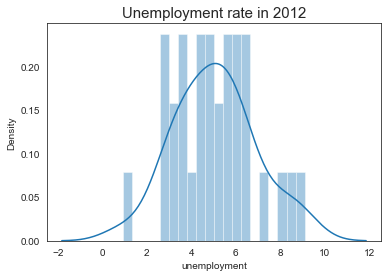

In [25]:
sns.set_style(style = 'white')
sns.distplot(graduateData[2012]['unemployment'], bins=20);
plt.title('Unemployment rate in 2012', fontsize=15)

__The graph above shows us the unemployment rates in 2012 and 2018. This should give us a feel for which year had higher unemployment rates and whether the year with the higher unemployment rate had a higher rate of students enrolling in graduate programs.__

__We find out that there is a weird char in 2018 unemployment rate column. Let's find that row check check what's going on.__

In [26]:
graduateData[2018][graduateData[2018]['unemployment'] =='‡']

,major,unemployment,earning


C:\Users\yxs_t\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='unemployment', ylabel='Density'>

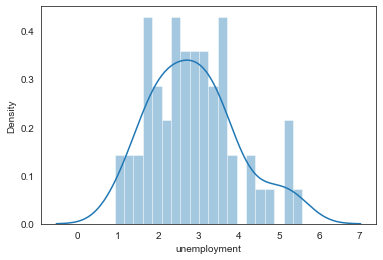

In [27]:
graduateData[2018] = graduateData[2018][graduateData[2018]['unemployment'] !='‡']
sns.distplot(graduateData[2018]['unemployment'], bins=20)

__As we can see, the distribution of unemployment rate is still in a normal distribution roughly but and the majority of data are fall in range of 1%-4%, which is way smaller than in 2012.__

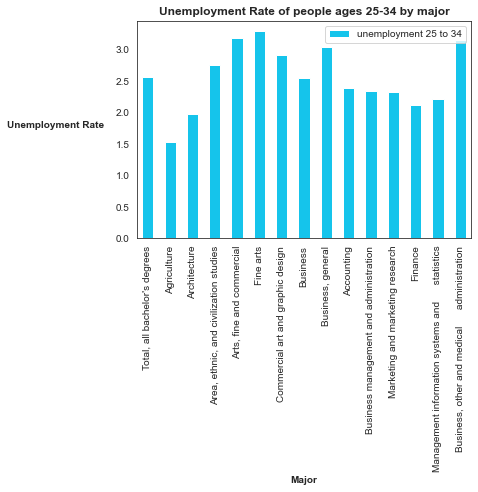

In [28]:
general_income_2018[0:15].plot(x = 'categories',y = 'unemployment 25 to 34', kind = 'bar',xlim = (0,0.3), color = '#15C4EB')
plt.title("Unemployment Rate of people ages 25-34 by major",fontweight = 'bold')
plt.ylabel("Unemployment Rate", rotation = 0,labelpad = 60,fontweight= 'bold')
plt.xlabel("Major",fontweight = 'bold')
plt.show()

The graph above shows us the relationship between unemployment rate and majors in 2018. This data helps us understand which majors end up with the most people unemployed and potentially shows us which major might have the most impact in graduate school enrollment. 

Now we want to take a look at the graduate school enrollment

Text(0.5, 1.0, 'Graduate school enrollment 2018')

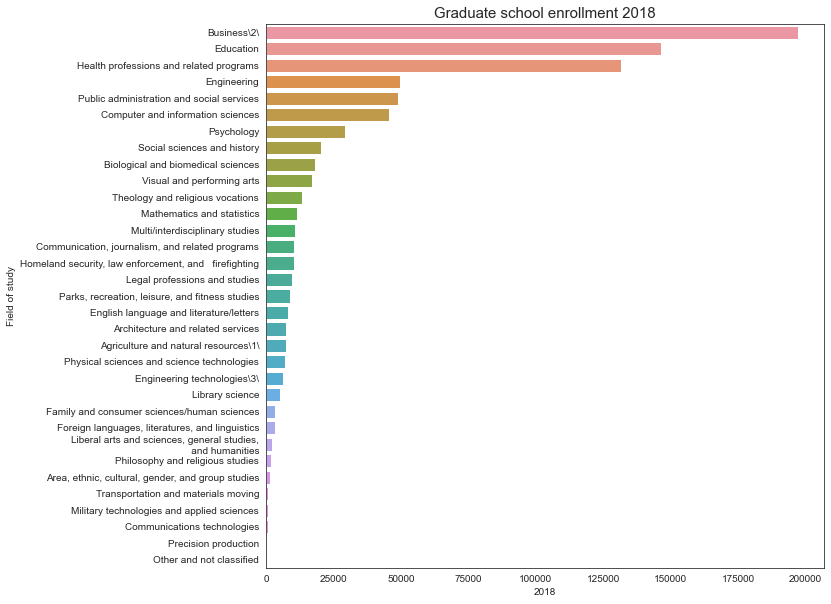

In [29]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x ='2018', y ='Field of study', data = graduate_enroll.drop(0).sort_values(by=['2018'], ascending=False))
plt.title('Graduate school enrollment 2018', fontsize=15)

We can see that some majors had a really high amount of graduate student than other majors, but what if we take the amount of college graduate into the consideration?

calculating the proportion of college graduate choose to enroll in a graduate program

In [30]:
years = ['1970','1975','1980','1985','1990','1995','2000','2005','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [31]:
percentage_enroll = pd.DataFrame()

In [32]:
percentage_enroll['Field of study'] = graduate_enroll['Field of study']

In [33]:
for y in years:
    percentage_enroll[y] = graduate_enroll[y] / undergraduate[y]

In [34]:
percentage_enroll = percentage_enroll.dropna()
percentage_enroll = percentage_enroll.reset_index()
percentage_enroll = percentage_enroll.drop(['index'], axis=1)

Text(0.5, 1.0, 'Proportion of college student enrolled in graduate schools')

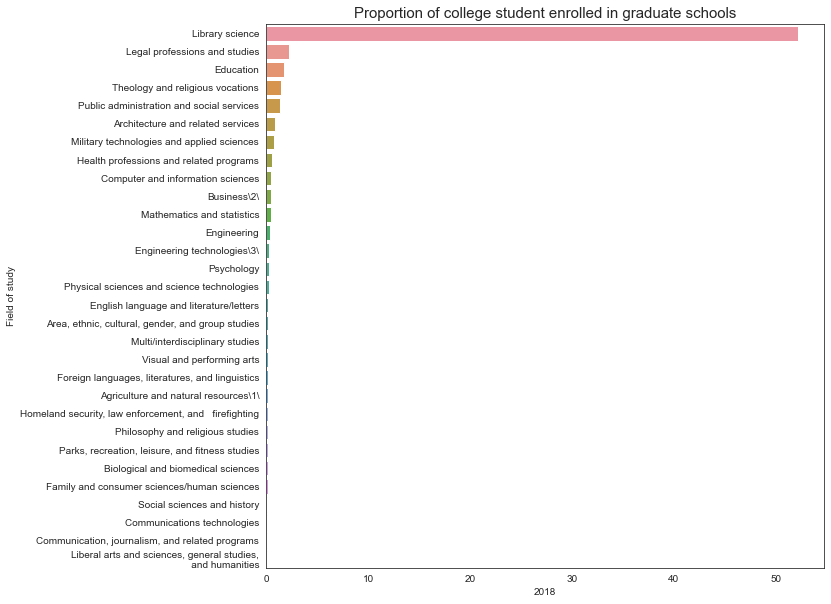

In [35]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x ='2018', y ='Field of study', data = percentage_enroll.drop(0).sort_values(by=['2018'], ascending=False))
plt.title('Proportion of college student enrolled in graduate schools', fontsize=15)
#ax = sns.scatterplot(x='Field of study', y = '2017', data=graduate_enroll)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()


We can see that some majors have an unproportional high percetage (larger than 100%) between the undergraduate graduate number and graduate school enrollment, so in order to better perform the analysis, we'd like to drop these majors.

In [36]:
percentage_enroll['Field of study']

0                                                 Total
1                  Agriculture and natural resources\1\
2                     Architecture and related services
3     Area, ethnic, cultural, gender, and group studies
4                    Biological and biomedical sciences
5                                           Business\2\
6       Communication, journalism, and related programs
7                           Communications technologies
8                     Computer and information sciences
9                                             Education
10                                          Engineering
11                          Engineering technologies\3\
12              English language and literature/letters
13          Family and consumer sciences/human sciences
14      Foreign languages, literatures, and linguistics
15              Health professions and related programs
16    Homeland security, law enforcement, and   fire...
17                        Legal professions and 

In [37]:
percentage_enroll_drop = percentage_enroll.loc[percentage_enroll['2018'] < 1].reset_index().drop('index', axis=1)


Plot the graph above again but with the new data.

Text(0.5, 1.0, 'Proportion of college student enrolled in graduate schools')

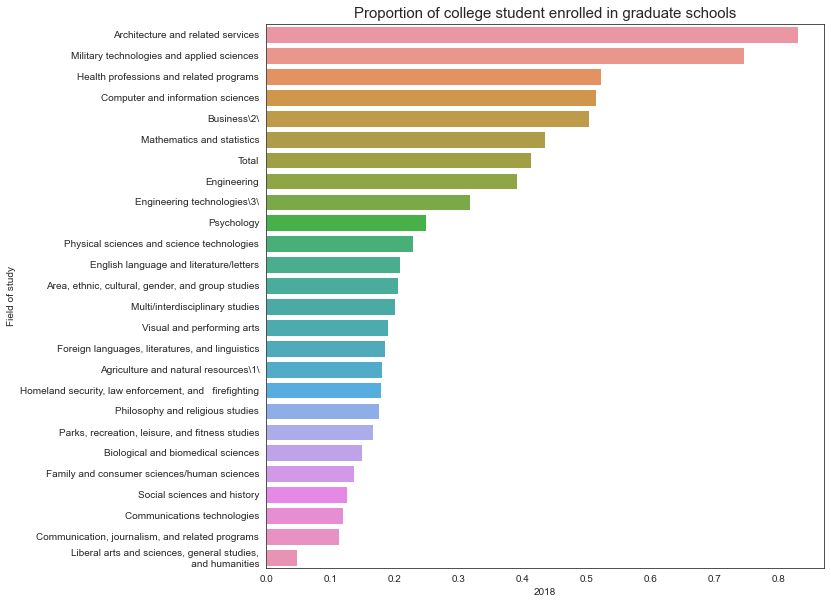

In [38]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x ='2018', y ='Field of study', data = percentage_enroll_drop.sort_values(by=['2018'], ascending=False))
plt.title('Proportion of college student enrolled in graduate schools', fontsize=15)

Let's see the trend of graduate enrollment in numbers from 1970 to 2015

Sort the data by the amount of enrollment in 2015.

In [39]:
graduate_enroll_sorted = graduate_enroll.sort_values(by=['2015']).reset_index()

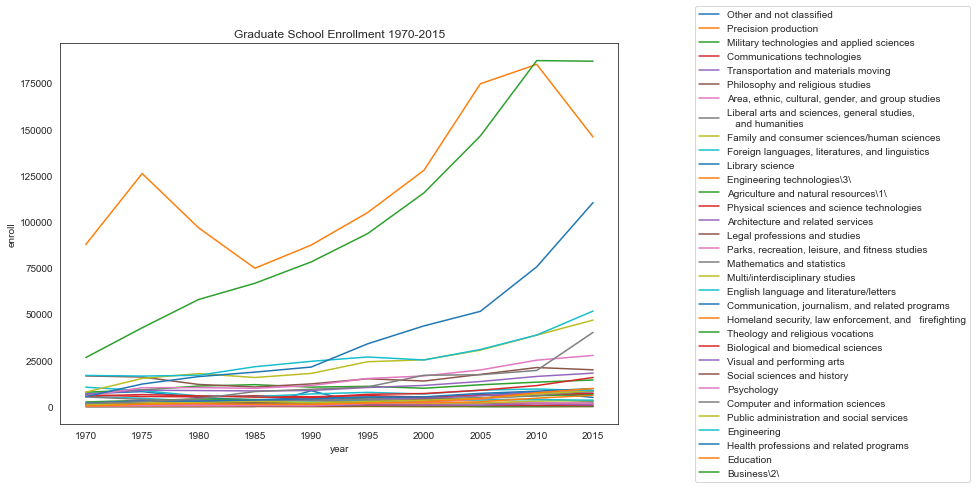

In [40]:
x = ['1970', '1975', '1980', '1985', '1990',
       '1995', '2000', '2005', '2010', '2015']
y = []

fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)

for i in range(0,33):
    for col in x :
        y.append(graduate_enroll_sorted[col][i])
    data = pd.DataFrame({
        "enroll": y,
        "year": x
    })
    sns.lineplot(data=data, x='year', y='enroll').set_title("Graduate School Enrollment 1970-2015")
    y = []
    
fig.legend(graduate_enroll_sorted['Field of study'][0:33],bbox_to_anchor=(1,0), loc='lower left')

We can see that while some majors enjoyed a huge increase in numbers, there's a huge gap in number between the popular majors and the less popular majors. So we can drop the top 3 majors with highest number of enrollment to have a better look at the less popular majors.

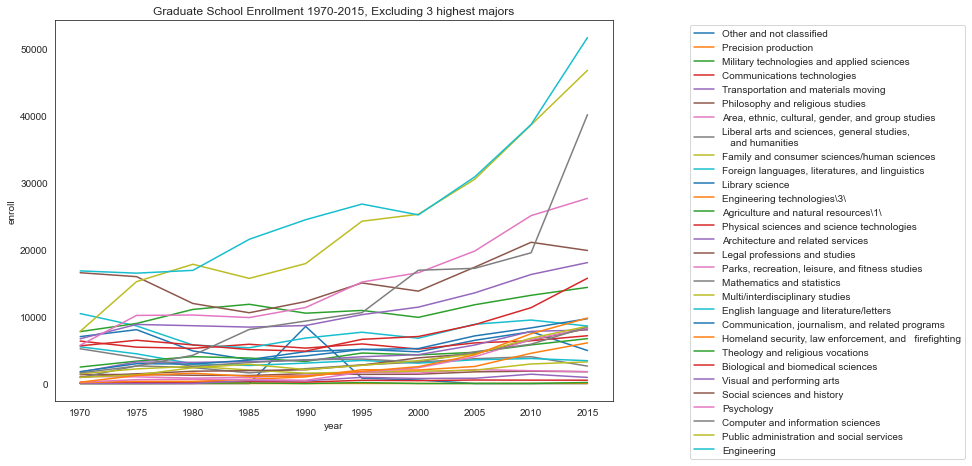

In [41]:
x = ['1970', '1975', '1980', '1985', '1990',
       '1995', '2000', '2005', '2010', '2015']
y = []

fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)

for i in range(0,30):
    for col in x :
        y.append(graduate_enroll_sorted[col][i])
    data = pd.DataFrame({
        "enroll": y,
        "year": x
    })
    sns.lineplot(data=data, x='year', y='enroll').set_title("Graduate School Enrollment 1970-2015, Excluding 3 highest majors")
    y = []
    
fig.legend(graduate_enroll_sorted['Field of study'][0:30],bbox_to_anchor=(1,0), loc='lower left')

__As we can see from the graph, while for some majors, like Engineering and Public administration and social service have drastic increasing trend starting from 2000. For computer and information science, the climbing starts from around 2010. But many other majors experienced a decline from 2010-2015. We guess that this may related to the economic crisis in 2008. Let's see a more detailed year by year data from 2009 to 2018__

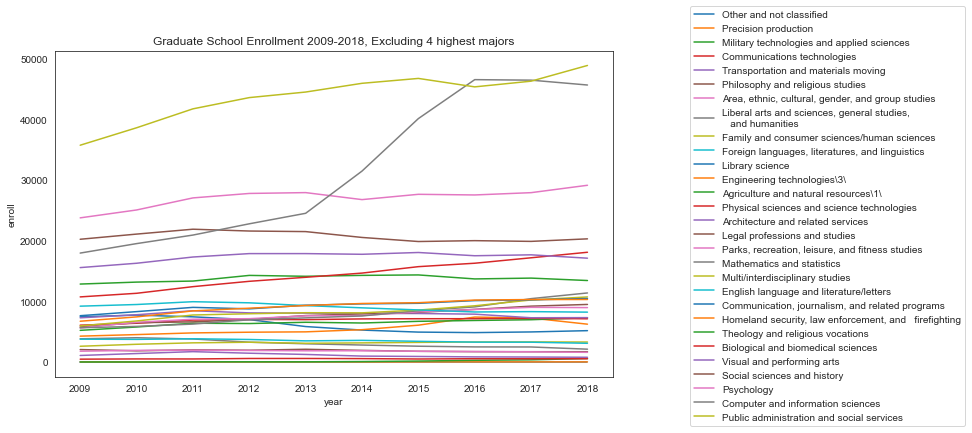

In [42]:
x = ['2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018']
y = []

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

for i in range(0,29):
    for col in x :
        y.append(graduate_enroll_sorted[col][i])
    data = pd.DataFrame({
        "enroll": y,
        "year": x
    })
    sns.lineplot(data=data, x='year', y='enroll').set_title("Graduate School Enrollment 2009-2018, Excluding 4 highest majors")
    y = []
    
fig.legend(graduate_enroll_sorted['Field of study'][0:29],bbox_to_anchor=(1,0), loc='lower left')

__We can see that most majors' enrollment number stayed at the same level between 2009-2018 an actually enjoyed a increase around 2010, except computer science. Computer science's enrollment climbing actually starts from 2013 and did't change a lot after 2016. So the hypothesis of economic crisis negatively impacted the graduate school enrolment might be wrong.__

 __From the previous graphs, we can see most of the majors have an enrollment lower than 10000 people, but what if we look at the trend of the proportion of students who enroll in graduate school by majors? Let's look at the trend of proportion of students who enroll in graduate school from 1970 to 2015__

In [43]:
percentage_enroll_sorted = percentage_enroll_drop.sort_values(by=['1995']).reset_index()

In [44]:
majors = percentage_enroll_sorted['Field of study'].unique()

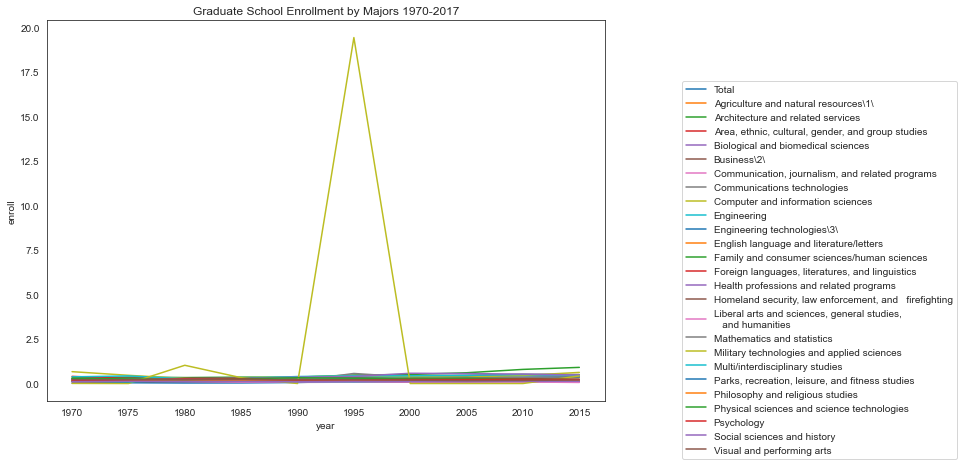

In [45]:
x = ['1970', '1975', '1980', '1985', '1990',
       '1995', '2000', '2005', '2010', '2015']
y = []

fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)

for i in range(0,26): 
    for col in x :
        y.append(percentage_enroll_drop[col][i])
    data = pd.DataFrame({
        "enroll": y,
        "year": x
    })
    sns.lineplot(data=data, x='year', y='enroll').set_title("Graduate School Enrollment by Majors 1970-2017")
    y = []
    
fig.legend(percentage_enroll_drop['Field of study'][0:26],bbox_to_anchor=(1,0), loc='lower left')

__We can see the Military technology and applied sciences major had an exceptional high enrollment rate in 1995, let's drop that major and look at the trend again__

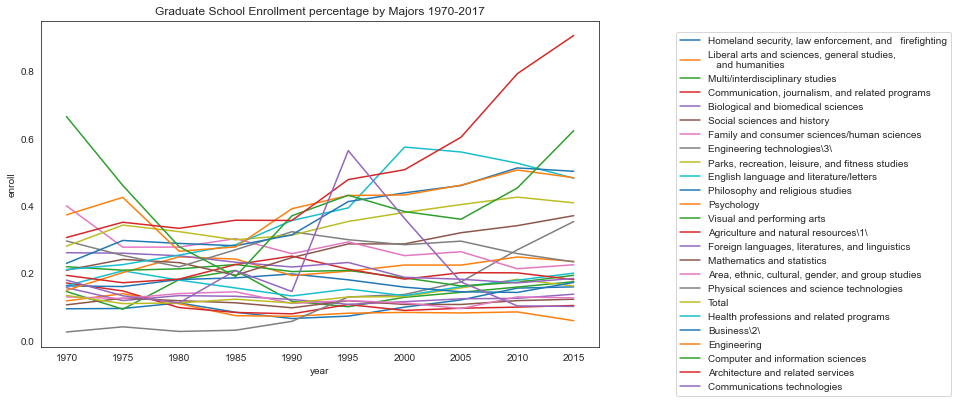

In [46]:
y = []
x = ['1970', '1975', '1980', '1985', '1990',
       '1995', '2000', '2005', '2010', '2015']
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

for i in range(0,25): 
    for col in x :
        y.append(percentage_enroll_sorted[col][i])
    data = pd.DataFrame({
        "enroll": y,
        "year": x
    })
    sns.lineplot(data=data, x='year', y='enroll').set_title("Graduate School Enrollment percentage by Majors 1970-2017")
    y = []
    
fig.legend(percentage_enroll_sorted['Field of study'][0:25],bbox_to_anchor=(1,0), loc='lower left')

__We can see that most of the majors experienced a increase before 2000s and some of them experienced a decline after that. Let's look at a more detailed data from 2009 to 2018 to see the detail.__

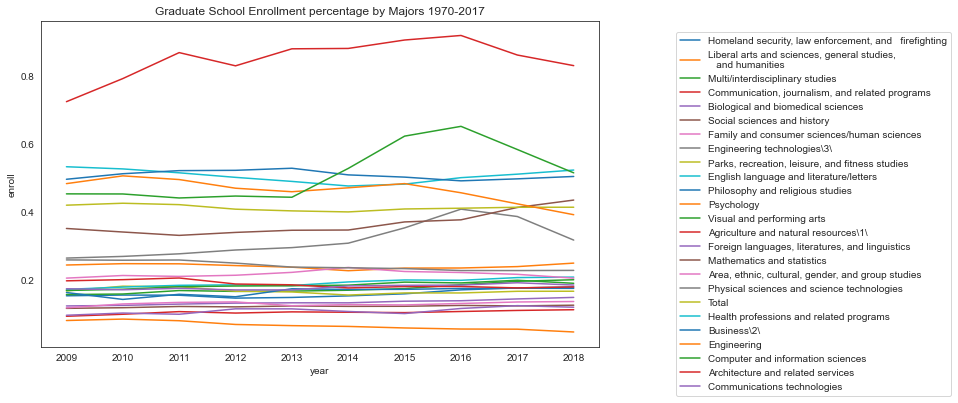

In [47]:
y = []
x = ['2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018']
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

for i in range(0,25): 
    for col in x :
        y.append(percentage_enroll_sorted[col][i])
    data = pd.DataFrame({
        "enroll": y,
        "year": x
    })
    sns.lineplot(data=data, x='year', y='enroll').set_title("Graduate School Enrollment percentage by Majors 1970-2017")
    y = []
    
fig.legend(percentage_enroll_sorted['Field of study'][0:25],bbox_to_anchor=(1,0), loc='lower left')

__Let's take a look at computer science and look at the employment and income alone with the graduate scholl enroll rate. In the following graphs, we devide income by 100000 and devide unemployment by 10 to better plot with enrollment to look at the trend__

In [48]:
year_count = 2012
enroll_count = -2
cse_unemployment = []
cse_income = []
cse_enroll = []
cse_years = []
while(year_count < 2018):
    cse_years.append(year_count)
    cse_enroll.append(percentage_enroll_sorted.loc[percentage_enroll_sorted['Field of study'] == 'Computer and information sciences'].iloc[:,enroll_count].values[0])
    cse_unemployment.append(graduateData[year_count].loc[graduateData[year_count]['major'] == 'Computer and information systems'].iloc[:,-2].values[0]/10)
    cse_income.append(graduateData[year_count].loc[graduateData[year_count]['major'] == 'Computer and information systems'].iloc[:,-1].values[0]/100000)
    year_count = year_count + 1
    enroll_count = enroll_count - 1
    
cse_data = pd.DataFrame({'year': cse_years, 'unemployment': cse_unemployment, 'earning': cse_income, 'enroll': cse_enroll})

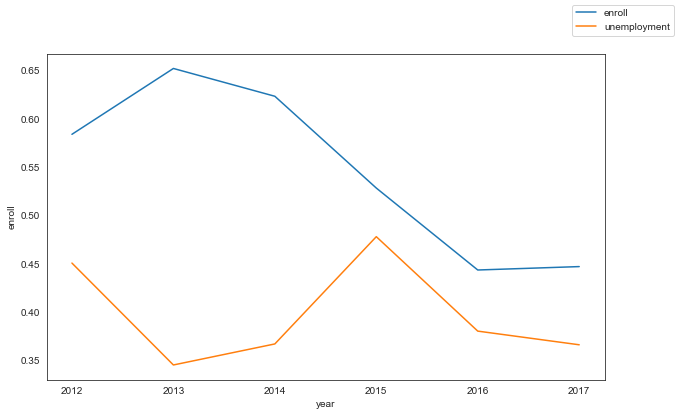

In [49]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data=cse_data, x='year', y='enroll')
sns.lineplot(data=cse_data, x='year', y='unemployment')
fig.legend(['enroll','unemployment'])

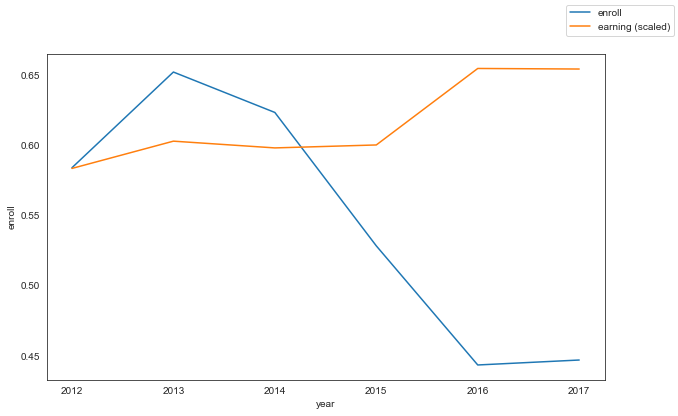

In [50]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data=cse_data, x='year', y='enroll')
sns.lineplot(data=cse_data, x='year', y='earning')
fig.legend(['enroll','earning (scaled)'])

__Well, that's not possible to say whether there's definitely a relationship betwee the data or not. Maybe some linear regression can help us better observe the problem.__

# Inferential Analysis

## Additional data wrangeling for the analysis

__We want to take a look at the majors contained in datasets we uses for the analysis. We are having a problem that the data from each year have different number of majors__

In [51]:
graduateData[2018]['major'].unique()

array(['Agriculture', 'Architecture',
       'Area, ethnic, and civilization studies',
       'Arts, fine and commercial', 'Fine arts',
       'Commercial art and graphic design', 'Business',
       'Business, general', 'Accounting',
       'Business management and administration',
       'Marketing and marketing research', 'Finance',
       'Management information systems and      statistics',
       'Business, other and medical      administration',
       'Communications and communications    technologies',
       'Computer and information sciences',
       'Criminal justice and fire protection', 'Education',
       'General education', 'Early childhood education',
       'Elementary education', 'Education, other',
       'Engineering and engineering-related   fields',
       'General engineering', 'Chemical engineering', 'Civil engineering',
       'Computer engineering', 'Electrical engineering',
       'Mechanical engineering', 'Engineering, other',
       'Engineering technologi

In [52]:
graduateData[2014]['major'].unique()

array(['Architecture', 'Area, ethnic, and civilization studies',
       'Communications and communications technologies',
       'Computer and information systems', 'General education',
       'Elementary education', 'Education, other', 'General engineering',
       'Chemical engineering', 'Civil engineering',
       'Computer engineering', 'Electrical engineering',
       'Mechanical engineering', 'Engineering, other',
       'Engineering technologies', 'English language and literature',
       'Family and consumer sciences',
       'General medical and health services',
       'Liberal arts and humanities', 'Mathematics',
       'Multi/interdisciplinary studies',
       'Physical fitness, parks, recreation and leisure',
       'Philosophy and religious studies', 'Economics', 'Geography',
       'International relations', 'Political science and government',
       'Sociology', 'Miscellaneous social sciences',
       'Theology and religious vocations', 'Other fields'], dtype=object)

__For the data prior to 2015, there are much smaller number of majors available__

In [53]:
percentage_enroll_sorted['Field of study'].unique

<bound method Series.unique of 0     Homeland security, law enforcement, and   fire...
1     Liberal arts and sciences, general studies,\n ...
2                       Multi/interdisciplinary studies
3       Communication, journalism, and related programs
4                    Biological and biomedical sciences
5                           Social sciences and history
6           Family and consumer sciences/human sciences
7                           Engineering technologies\3\
8       Parks, recreation, leisure, and fitness studies
9               English language and literature/letters
10                     Philosophy and religious studies
11                                           Psychology
12                           Visual and performing arts
13                 Agriculture and natural resources\1\
14      Foreign languages, literatures, and linguistics
15                           Mathematics and statistics
16    Area, ethnic, cultural, gender, and group studies
17           Phys

__And for the Proportion of college student enrolled in graduate schools dataset, the number of majors is even smaller.__

__So in our analysis, we will not use major as a element of the predictive analysis. But we are having another problem that the data for the bachelar degree holder has a different list of majors than the enrollment data, so we need a way to merge the two datasets together. We will use major names in graduation data and index in the proportion data to make a dictionary to facilitate the processing.__

In [54]:
major_dic = {}

In [55]:
for u in graduateData[2018]['major'].unique():
    major_dic[u] = -1
for u in graduateData[2014]['major'].unique():
    major_dic[u] = -1

In [56]:
major_dic['Agriculture'] = 13
major_dic['Architecture'] = 23
major_dic['Commercial art and graphic design'] = 12
major_dic['Business, general'] = 20
major_dic['Communications and communications    technologies'] = 24
major_dic['Communications and communications technologies'] = 24
major_dic['Computer and information sciences'] = 22
major_dic['Computer and information systems'] = 22
major_dic['Liberal arts and humanities'] = 1
major_dic['General engineering'] = 21
major_dic['Social sciences'] = 5
major_dic['Psychology'] = 11
major_dic['Linguistics and comparative language and    literature'] = 14
major_dic['Philosophy and religious studies'] = 16
major_dic['English language and literature'] = 14
major_dic['Mathematics'] = 15
major_dic['Physical fitness, parks, recreation and    leisure'] = 8
major_dic['Physical fitness, parks, recreation and leisure'] = 8
major_dic['Family and consumer sciences'] = 6

In [57]:
year_count = 2012
while(year_count < 2019):
    temp = []
    for major in graduateData[year_count]['major']:
        if(major in major_dic):
            if(major_dic[major] != -1):
                temp.append(percentage_enroll_sorted.loc[major_dic[major]][str(year_count)])            
            else:
                temp.append(-1)
        else:
            temp.append(-1)
    graduateData[year_count] = graduateData[year_count].assign(percentage = temp)
    year_count = year_count + 1

In [58]:
for data in graduateData:
    graduateData[data]=graduateData[data][graduateData[data]['percentage'] != -1]

In [59]:
finalData = pd.concat([graduateData[2012], graduateData[2013],graduateData[2014], graduateData[2015],graduateData[2016], graduateData[2017], graduateData[2018]]).reset_index().drop('index', axis=1)

In [60]:
finalData['unemployment'] = [float(x) for x in finalData['unemployment']]
finalData

,major,unemployment,earning,percentage
0,Architecture,6.002544,44930.0,0.829661
1,Communications and communications technologies,4.832644,40180.0,0.115701
2,Computer and information systems,4.506926,58330.0,0.447048
3,General engineering,4.447880,59830.0,0.470071
4,English language and literature,5.866855,39510.0,0.171294
...,...,...,...,...
87,Mathematics,2.519661,54560.0,0.435248
88,"Physical fitness, parks, recreation and lei...",2.138231,45500.0,0.167389
89,Philosophy and religious studies,3.085815,48840.0,0.205852
90,Psychology,3.172409,41420.0,0.250009


# Linear Regression

__Scale data in finalData to have all data in roughly same scale and facilitate prediction__

In [61]:
finalData['percentage'] = finalData['percentage'] * 100;
finalData['earning'] = finalData['earning'] / 1000;
finalData

,major,unemployment,earning,percentage
0,Architecture,6.002544,44.93,82.966076
1,Communications and communications technologies,4.832644,40.18,11.570082
2,Computer and information systems,4.506926,58.33,44.704774
3,General engineering,4.447880,59.83,47.007106
4,English language and literature,5.866855,39.51,17.129394
...,...,...,...,...
87,Mathematics,2.519661,54.56,43.524822
88,"Physical fitness, parks, recreation and lei...",2.138231,45.50,16.738879
89,Philosophy and religious studies,3.085815,48.84,20.585189
90,Psychology,3.172409,41.42,25.000858


__First let's take a rough look at the relationship between factors__

array([[<AxesSubplot:xlabel='unemployment', ylabel='unemployment'>,
        <AxesSubplot:xlabel='earning', ylabel='unemployment'>,
        <AxesSubplot:xlabel='percentage', ylabel='unemployment'>],
       [<AxesSubplot:xlabel='unemployment', ylabel='earning'>,
        <AxesSubplot:xlabel='earning', ylabel='earning'>,
        <AxesSubplot:xlabel='percentage', ylabel='earning'>],
       [<AxesSubplot:xlabel='unemployment', ylabel='percentage'>,
        <AxesSubplot:xlabel='earning', ylabel='percentage'>,
        <AxesSubplot:xlabel='percentage', ylabel='percentage'>]],
      dtype=object)

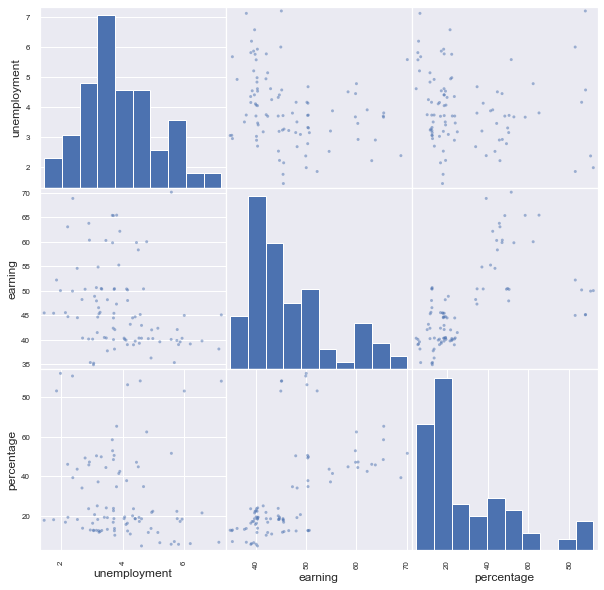

In [62]:
sns.set(rc={'figure.figsize':(10,10)})
pd.plotting.scatter_matrix(finalData)

# Model 1: Unemployment rate vs Graduate enrollment rate

<AxesSubplot:xlabel='unemployment', ylabel='percentage'>

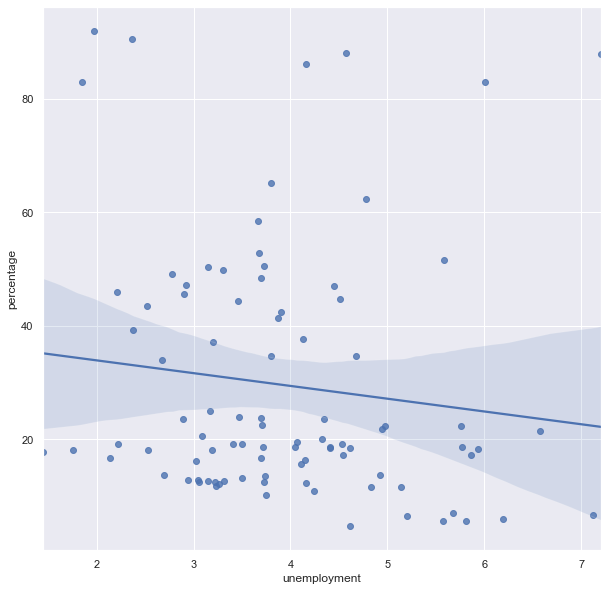

In [63]:
sns.regplot(data=finalData, x='unemployment', y='percentage')

In [64]:
outcome_1, predictors_1 = patsy.dmatrices("percentage ~ unemployment", finalData)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [65]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             percentage   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.356
Date:                Thu, 18 Mar 2021   Prob (F-statistic):              0.247
Time:                        08:53:17   Log-Likelihood:                -414.62
No. Observations:                  92   AIC:                             833.2
Df Residuals:                      90   BIC:                             838.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       38.3891      7.953      4.827   

## Model 1:
## Graduate enrollment rate = -2.2517*Unemployment + 38.3891

# Model 2: Median annual income vs Graduate enrollment rate

<AxesSubplot:xlabel='earning', ylabel='percentage'>

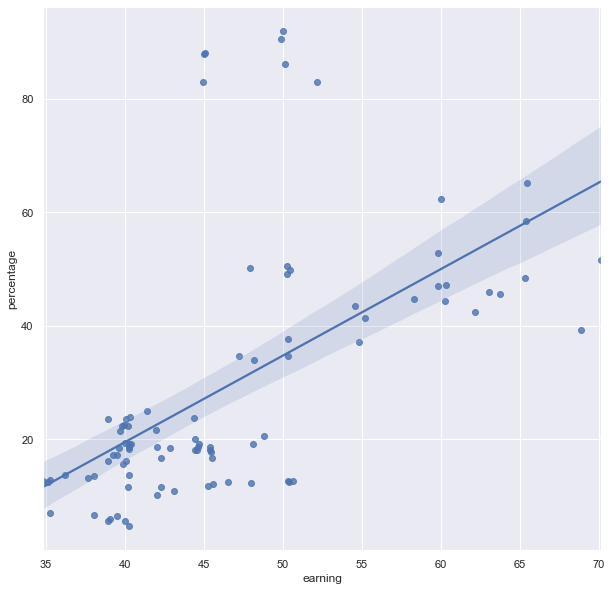

In [66]:
sns.regplot(data=finalData, x='earning', y='percentage')

In [67]:
outcome_2, predictors_2 = patsy.dmatrices("percentage ~ earning", finalData)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

In [68]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:             percentage   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     46.40
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.06e-09
Time:                        08:53:18   Log-Likelihood:                -396.18
No. Observations:                  92   AIC:                             796.4
Df Residuals:                      90   BIC:                             801.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.5788     10.609     -3.919      0.0

## Model 2:
## Graduate enrollment rate = 1.5261*Income - 41.5788

# Model 3: Combined

In [69]:
outcome_3, predictors_3 = patsy.dmatrices("percentage ~ earning + unemployment", finalData)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()

In [70]:
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:             percentage   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     23.10
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           8.29e-09
Time:                        08:53:18   Log-Likelihood:                -396.07
No. Observations:                  92   AIC:                             798.1
Df Residuals:                      89   BIC:                             805.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -45.9686     14.274     -3.221   

## Model 3:
## Graduate enrollment rate = 0.7642*Unemployment + 1.5557*earning - 45.9686

# Ethics & Privacy

As given in class ethics is defined “Moral principles that govern a person’s behaviour or the conducting of an activity”. We plan to gather and use data that is available on public websites to ensure we respect the ethics involved in this project. We plan to find datasets that are not prohibited to be used and that do not violate any ethical/privacy concerns as we have found above. Most of this data is anonymous and involves data collected by gender, ethnicity, major, year, and graduation period . This allows the individual data of the people to be protected as we are collecting public data that does not single anybody out. We believe that the data collected will greatly help us in solving our research question which is how covid has impacted the employment rate and career plans for new graduates. The factors listed above will help paint our people of interest and see how their background and education correlate to employment and career plans.

All our datasets are online and public information so we do not believe there is any privacy violation. We will ensure not to give out explicit information on any individual throughout the course of this project. We aim to make sure any data collected will remain private if it’s not public already, to ensure that nobody gets access to information they are not supposed to. We are ensuring that any personal data is protected from public view for privacy and ethical reasons. We admit some of our data might be biased, but it shouldn’t be to a large extent as we tried to use official government and unbiased sources. Any contingencies in our data will be due to the reporting of such officiating bodies and we will try to keep the data as close to the original data source as possible to lessen the bias. 


# Conclusion & Discussion

In our study we had started out to find to what extent did the unemployment rate and salary affect graduate school enrollment. We made sure to clean the data and got rid of any outliers or variables to improve data quality. We found that there is a correlation between the median annual income and graduation enrollment and a negative relationship between unemployment rate and graduation enrollment. The relationship between Graduate enrollment rate and unemployment is Graduate enrollment = -2.2517*Unemployment + 38.3891, which means for 1% increase in unemployment  rate there was a 2.2517 decrease in graduate enrollment. However, the standard error in this model is comparely large, which is 1.97. Using our second model we found the regression relationship to be Graduate enrollment rate = 1.5261*Income - 41.5788, which means for every 1% increase in income there was a 1.5261 increase in graduate enrollment, a strong correlation. After combining our predictors we found that earnings had a stronger impact on graduate enrollment than unemployment rate. This means that if earnings were higher then the graduate rate enrollment would most likely be higher too. The relationship for the 3rd regression is as follows. Graduate enrollment rate = 0.7642Unemployment + 1.5557earning - 45.9686. It’s evident that income plays a big role in graduate enrollment and we believe this is because graduate programs cost a lot. What makes it interesting is that the unemployment rate by itself is negatively affecting the graduate enrollment rate but when combined with annual income, it also becomes positive. This is a big financial decision so it wouldn’t make sense for unemployed students to take on more loans at the graduate level. It would make sense if a student was financially stable and wanted to either advance or switch their career focus, which is why we think this relation exists.

Throughout our project we noticed a couple things we could have done better. We should’ve cleaned our data more as we saw some slight outliers that slightly lessened with the quality of our data. Furthermore, we should’ve considered generalizing more broad major categories as there are many majors that may exist that did not in the past, such as data science. There may also be majors that no longer exist that we could’ve cleaned from our data. If we were able to implement more cleaning, we would have more accurate regression models. 


# Contribution

- Gavin Nijjer:  EDA, Write-up, Slides, Video, Data interpretation
- Gurinderbir Bains: Writeup, Data interpretation, Slides, Video
- Xiaoshuo Yao: Data cleaning and wrangling, EDA, Data visualization
- Jiadong Chen: Data cleaning and wrangling, EDA, Data visualization